In [2]:
import pandas as pd
import json 
import os

In [40]:
comments_dir = "../data/filtered/comments"
posts_dir = "../data/filtered/posts"
google_data_files = ["../data/raw/google_trends_since_june_full_names.csv",
                      "../data/raw/google_trends_since_june_surnames.csv"]
polls_dir = "../data/raw/presidential_general_averages.csv"
output_dir = "../data/processed"

Google trends

In [62]:
file_full_name = pd.read_csv(google_data_files[0], skiprows=1)
file_surname = pd.read_csv(google_data_files[1], skiprows=1)

# change column names
google_df = pd.merge(file_full_name, file_surname, on="Día", how="inner")
print(google_df.columns)

# change column names

google_df.columns = ["date", "Kamala_Harris", "Joe_Biden", "Donald_Trump", "Harris", "Biden", "Trump"]

# replace "<1" with 0
google_df = google_df.replace("<1", 0)

# convert columns to numeric
google_df["Kamala_Harris"] = pd.to_numeric(google_df["Kamala_Harris"])
google_df["Joe_Biden"] = pd.to_numeric(google_df["Joe_Biden"])
google_df["Donald_Trump"] = pd.to_numeric(google_df["Donald_Trump"])
google_df["Harris"] = pd.to_numeric(google_df["Harris"])
google_df["Biden"] = pd.to_numeric(google_df["Biden"])
google_df["Trump"] = pd.to_numeric(google_df["Trump"])

google_df['all_Kamala_Harris'] = (google_df['Kamala_Harris'] + google_df['Harris']) / 2
google_df['all_Joe_Biden'] = (google_df['Joe_Biden'] + google_df['Biden']) / 2
google_df['all_Donald_Trump'] = (google_df['Donald_Trump'] + google_df['Trump']) / 2

google_df

Index(['Día', 'Kamala Harris: (Estados Unidos)', 'Joe Biden: (Estados Unidos)',
       'Donald Trump: (Estados Unidos)', 'Harris: (Estados Unidos)',
       'Biden: (Estados Unidos)', 'Trump: (Estados Unidos)'],
      dtype='object')


,date,Kamala_Harris,Joe_Biden,Donald_Trump,Harris,Biden,Trump,all_Kamala_Harris,all_Joe_Biden,all_Donald_Trump
0,2024-06-01,0,1,6,1,1,6,0.5,1.0,6.0
1,2024-06-02,0,1,5,1,1,5,0.5,1.0,5.0
2,2024-06-03,0,1,3,1,1,4,0.5,1.0,3.5
3,2024-06-04,0,1,3,1,2,3,0.5,1.5,3.0
4,2024-06-05,0,1,2,1,2,3,0.5,1.5,2.5
...,...,...,...,...,...,...,...,...,...,...
114,2024-09-23,2,0,3,3,0,4,2.5,0.0,3.5
115,2024-09-24,2,0,4,2,0,4,2.0,0.0,4.0
116,2024-09-25,2,0,3,3,0,4,2.5,0.0,3.5
117,2024-09-26,2,0,3,3,0,4,2.5,0.0,3.5


<Axes: xlabel='date'>

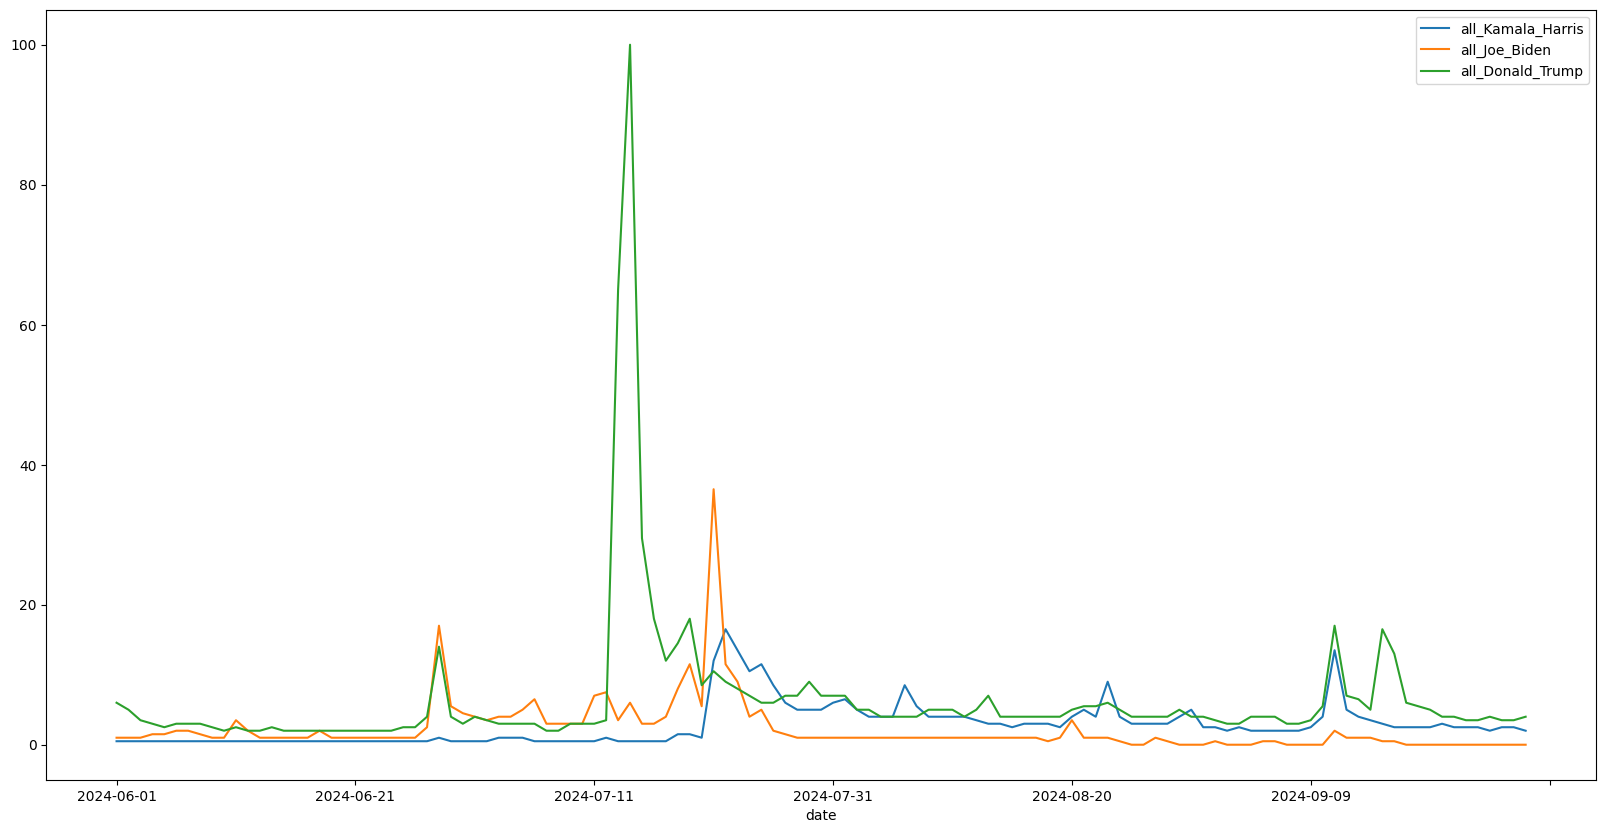

In [64]:
# plot all kamala, all biden, all trump
import matplotlib.pyplot as plt
google_df.plot(x='date', y=['all_Kamala_Harris', 'all_Joe_Biden', 'all_Donald_Trump'], figsize=(20, 10))

In [65]:
google_df.to_csv(os.path.join(output_dir, "google_trends.csv"), columns=["date", "all_Kamala_Harris", "all_Joe_Biden", "all_Donald_Trump"], index=False)

Presidential polls

In [68]:
polls_df = pd.read_csv(polls_dir)
# get data from 2024-06-01 to 2024-09-27
polls_df = polls_df[polls_df["date"] >= "2024-06-01"]
polls_df = polls_df[polls_df["date"] <= "2024-09-27"]

polls_df.head()

,candidate,date,pct_trend_adjusted,state,cycle,party,pct_estimate,hi,lo
21300,Trump,2024-09-26,NaN,Arizona,2024,REP,47.89430,49.230528,46.461395
21301,Harris,2024-09-26,NaN,Arizona,2024,DEM,47.07260,48.606225,45.628150
21302,Trump,2024-09-25,NaN,Arizona,2024,REP,47.91320,49.456457,46.390183
21303,Harris,2024-09-25,NaN,Arizona,2024,DEM,46.84855,48.441705,45.283692
21304,Trump,2024-09-24,NaN,Arizona,2024,REP,47.87990,49.483050,46.302042


In [70]:
polls_df.isna().sum()

candidate                0
date                     0
pct_trend_adjusted    3274
state                    0
cycle                    0
party                    0
pct_estimate             0
hi                       0
lo                       0
dtype: int64

In [71]:
polls_df.drop(columns=["pct_trend_adjusted"], inplace=True)

In [77]:
polls_df.sort_values(by="date", inplace=True)

In [90]:
# create a new df with date, candidate and mean of pct_estimate

polls_df_2 = polls_df.groupby(["date", "candidate"]).agg({"pct_estimate": "mean"}).reset_index()
polls_df_2

,date,candidate,pct_estimate
0,2024-06-01,Biden,38.668283
1,2024-06-01,Kennedy,9.181320
2,2024-06-01,Trump,42.883383
3,2024-06-02,Biden,38.705211
4,2024-06-02,Kennedy,9.238094
...,...,...,...
309,2024-09-24,Trump,46.263924
310,2024-09-25,Harris,48.292679
311,2024-09-25,Trump,46.302787
312,2024-09-26,Harris,48.572300


In [92]:
# drop where candidate is Kennedy
polls_df_2 = polls_df_2[polls_df_2["candidate"] != "Kennedy"]

<Axes: xlabel='date', ylabel='pct_estimate'>

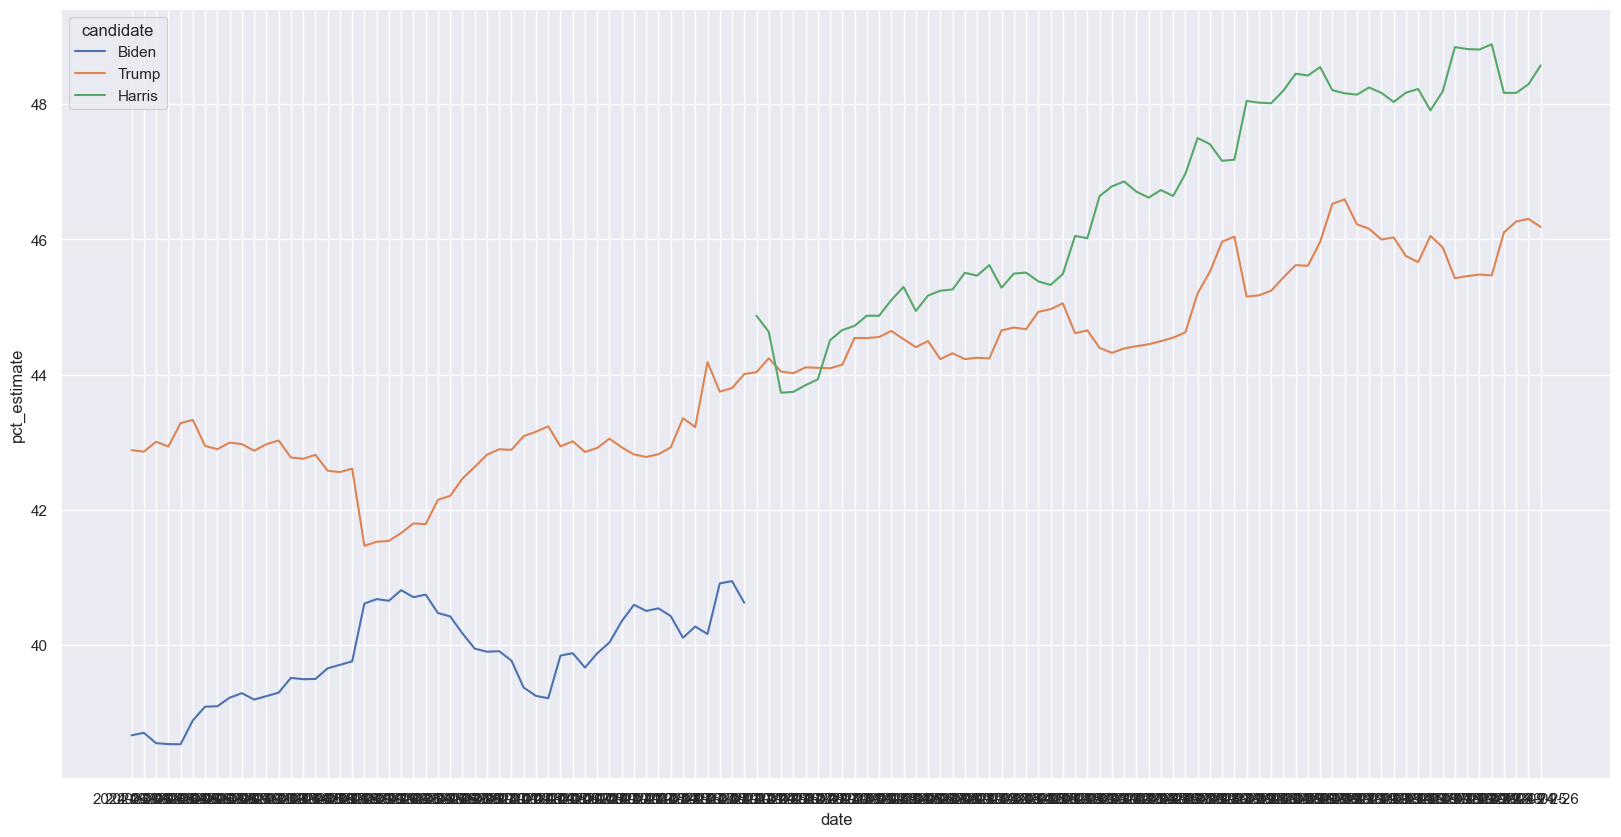

In [93]:
# plot by candidate over time
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

sns.lineplot(data=polls_df_2, x="date", y="pct_estimate", hue="candidate")


In [94]:
polls_df_2.to_csv(os.path.join(output_dir, "polls.csv"), index=False)

Comments

In [98]:
import re
def is_valid_comment(comment):
    body = comment["body"].lower()
    regex = r"(biden|trump|harris|donald|joe|kamala)"
    if re.search(regex, body):
        return True
    return False
    


In [106]:


final_df = pd.DataFrame()


for file in os.listdir(comments_dir):
    df = pd.read_json(os.path.join(comments_dir, file), lines=True) 
    bodies = df["body"].tolist()
    df['is_valid'] = df.apply(is_valid_comment, axis=1)
    df = df[df["is_valid"]]
    df.drop(columns=["is_valid", "created", "author"], inplace=True)
    df['date_day'] = df['datetime'].dt.date
    # remove links from body
    df['body'] = df['body'].apply(lambda x: re.sub(r"http\S+", "", x))
    final_df = pd.concat([final_df, df])



    
final_df.head()

,subreddit,post_id,id,parent,datetime,score,upvotes,body,date_day
1,politics,t3_1d5ov0s,t1_l6mt4yv,t3_1d5ov0s,2024-06-01 17:02:38,45,45,Ann Telnaes\n \n[Justice Alito responds to his...,2024-06-01
7,politics,t3_1d5ov0s,t1_l6mtz0p,t3_1d5ov0s,2024-06-01 17:07:51,20,20,"[Pat Bagley, The Salt Lake Tribune](\n\n* [Tru...",2024-06-01
13,politics,t3_1d5ov0s,t1_l6muzcd,t3_1d5ov0s,2024-06-01 17:14:08,20,20,"Dave Whamond: \n \n[Witch caught, hunt over](\...",2024-06-01
14,politics,t3_1d5ov0s,t1_l6mv0xy,t3_1d5ov0s,2024-06-01 17:14:25,21,21,R.J. Matson:\n \n[Trump felony convictionsouve...,2024-06-01
18,politics,t3_1d5ov0s,t1_l6mvls3,t3_1d5ov0s,2024-06-01 17:18:01,19,19,Martin Rowson\n \n[The insurrection will conti...,2024-06-01


In [107]:
final_df.to_csv(os.path.join(output_dir, "comments.csv"), index=False)

In [109]:
final_df.shape

(140549, 9)

Posts

In [110]:
import re
def is_valid_post(post):
    body = post["body"].lower()
    title = post["title"].lower()
    regex = r"(biden|trump|harris|donald|joe|kamala)"
    if re.search(regex, body) or re.search(regex, title):
        return True
    return False

In [113]:

final_df = pd.DataFrame()


for file in os.listdir(posts_dir):
    if file.endswith(".txt"):
        continue
    df = pd.read_json(os.path.join(posts_dir, file), lines=True) 
    bodies = df["body"].tolist()
    df['is_valid'] = df.apply(is_valid_comment, axis=1)
    df = df[df["is_valid"]]
    df.drop(columns=["is_valid", "created", "author", "id", "subreddit_id", "url"], inplace=True)
    df['date_day'] = df['datetime'].dt.date
    df['body'] = df['body'].apply(lambda x: re.sub(r"http\S+", "", x))
    final_df = pd.concat([final_df, df])

final_df.head()

,subreddit,name,datetime,score,ratio,title,body,date_day
3,politics,t3_1d83jzr,2024-06-04 19:57:34,120,0.98,Discussion Thread: Assorted Elections in Calif...,"DC, Montana, New Jersey, New Mexico, and South...",2024-06-04
4,politics,t3_1daejhk,2024-06-07 18:08:46,261,0.92,We’re the League of Women Voters! We're the te...,Hi! We’re experts and democracy champions from...,2024-06-07
6,politics,t3_1ddh3s1,2024-06-11 17:35:41,71,0.92,Discussion Thread: Assorted Elections on June ...,#Multi-State Reporting\n\n - The New York Time...,2024-06-11
7,politics,t3_1ddh490,2024-06-11 17:36:13,230,0.86,Discussion Thread: US House Rules Committee De...,Today's debate is scheduled to start at noon E...,2024-06-11
9,politics,t3_1de9brx,2024-06-12 17:23:13,3417,0.99,Donald Trump says Ken Paxton would be a good c...,"If he wins the White House back, [Donald Trump...",2024-06-12


In [117]:
final_df.to_csv(os.path.join(output_dir, "posts.csv"), index=False)